# Clustering Problem 
Le loueur veut faire un forfait en fonction de la météo pour encourager à faire du vélo quand la météo est moins bonne. Il voudrait savoir combien de forfaits faudrait-il proposer? Réaliser un clustering pour répondre à sa question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import datetime

from sklearn.metrics import r2_score

In [2]:
df_bike = pd.read_csv("Datas/data_minzhi.csv")

In [4]:
df_weather = df_bike.copy()
df_weather.drop(columns=['season','holiday','workingday','count','year','month','day','hour','dayofweek'], inplace=True)
df_weather

,weather,temp,atemp,humidity,windspeed
0,1,0.224490,0.305068,0.81,0.000000
1,1,0.204082,0.288064,0.80,0.000000
2,1,0.204082,0.288064,0.80,0.000000
3,1,0.224490,0.305068,0.75,0.000000
4,1,0.224490,0.305068,0.75,0.000000
...,...,...,...,...,...
10881,1,0.367347,0.423649,0.50,0.456213
10882,1,0.346939,0.372860,0.57,0.263195
10883,1,0.326531,0.338964,0.61,0.263195
10884,1,0.326531,0.372860,0.61,0.105325


In [5]:
numerical_features = ['temp','atemp','humidity','windspeed']
categorial_features = ['weather']

In [6]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df_weather[numerical_features] = scaler.fit_transform(df_weather[numerical_features])

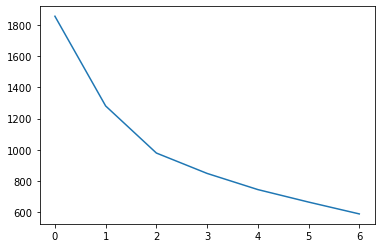

In [7]:
from kmodes.kprototypes import KPrototypes

#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df_weather, categorical=[0])
    cost.append(kproto.cost_)

plt.plot(cost)

In [9]:
model_2 = KPrototypes(n_clusters=2, init='Cao', random_state=42, n_jobs=-1)
model_2.fit_predict(df_weather, categorical=[0])
print(model_2.cost_)
#new column for cluster labels associated with each subject
df_weather['labels3'] = model_2.labels_

1280.61414386138


In [11]:
df_weather.describe()

,weather,temp,atemp,humidity,windspeed,labels3
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,1.418427,0.483098,0.512252,0.618865,0.224563,0.511207
std,0.633839,0.193917,0.189610,0.192450,0.143245,0.499897
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.326531,0.355856,0.470000,0.122840,0.000000
50%,1.000000,0.489796,0.525338,0.620000,0.228047,1.000000
75%,2.000000,0.632653,0.677928,0.770000,0.298225,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
import plotly.graph_objects as go
from sklearn import preprocessing

def plot_radars(data, group):

    scaler = preprocessing.MinMaxScaler(feature_range=(0,5))
    data_2 = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    data = pd.DataFrame(data, 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    data_2.drop(columns=group,inplace=True)
    fig = go.Figure()

    for k in [0,1]:
        # print(k)
        fig.add_trace(go.Scatterpolar(
            r=data_2[data[group]==k].iloc[:,0:].values.reshape(-1),
            theta=data_2.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 5]
        )),
        showlegend=True,
        title={
            'text': "Comparison of the means of variables in the cluster",
            'y':1,
            'x':1,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()
    return data_2

In [19]:
X_scaled_clusters = df_weather.groupby("labels3").mean()
X_scaled_clusters

,weather,temp,atemp,humidity,windspeed
labels3,,,,,
0,1.439015,0.314073,0.349099,0.621900,0.229473
1,1.398742,0.644711,0.668250,0.615962,0.219868


In [24]:
X_scaled_clusters = df_weather.groupby("labels3").mean()
output = plot_radars(data=X_scaled_clusters,
            group="labels3")